In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/WorldHappiness/'
%run WorldHappinessReport_configuration.ipynb


happiness2016 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/WorldHappiness/datasets/2016.csv', low_memory=False)

DistributionObj = Distribution(happiness2016)
CorrelationObj = Correlation(dataset=happiness2016)

happiness2016.head()

/content/drive/My Drive/ColabNotebooks/WorldHappiness


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [2]:
happiness2016.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 35.6 KB


In [3]:
happiness2016['Region'].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [4]:
happiness2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


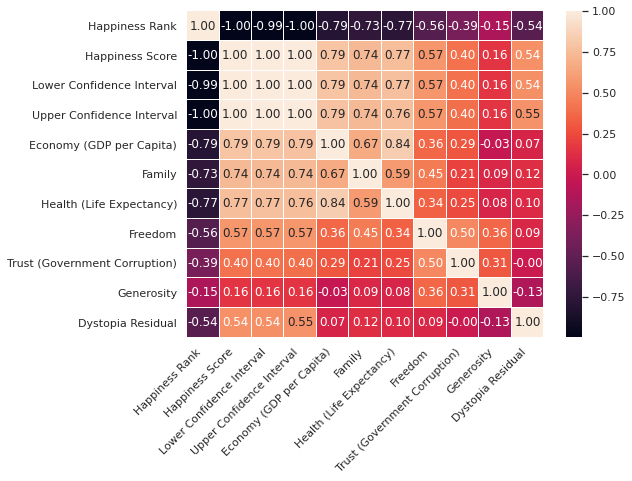

In [5]:
CorrelationObj.addCorrelationmap

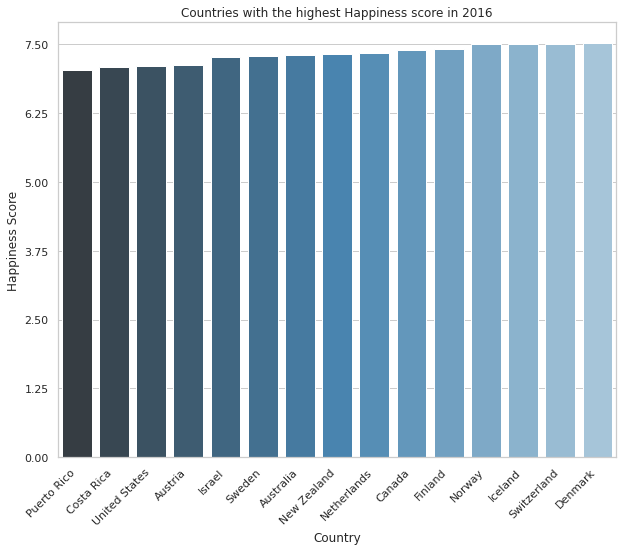

In [6]:
# Countries with the highest Happiness score in 2016
Sortedhappiness2016 = happiness2016.sort_values(by='Happiness Score')
Sortedhappiness2016Greaterthan7 = Sortedhappiness2016['Happiness Score'] >= 7
Sortedhappiness2016Greaterthan7 = Sortedhappiness2016[Sortedhappiness2016Greaterthan7]

x_data= 'Country'

sns.set_style('whitegrid') 
plt.figure(figsize=(10,8))
plt.yticks(np.arange(0, 14, step=1.25))

g = sns.barplot(  data=Sortedhappiness2016Greaterthan7, x=x_data,  y='Happiness Score',palette='Blues_d'  )

g.set( xlabel='Country', ylabel='Happiness Score', title='Countries with the highest Happiness score in 2016')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

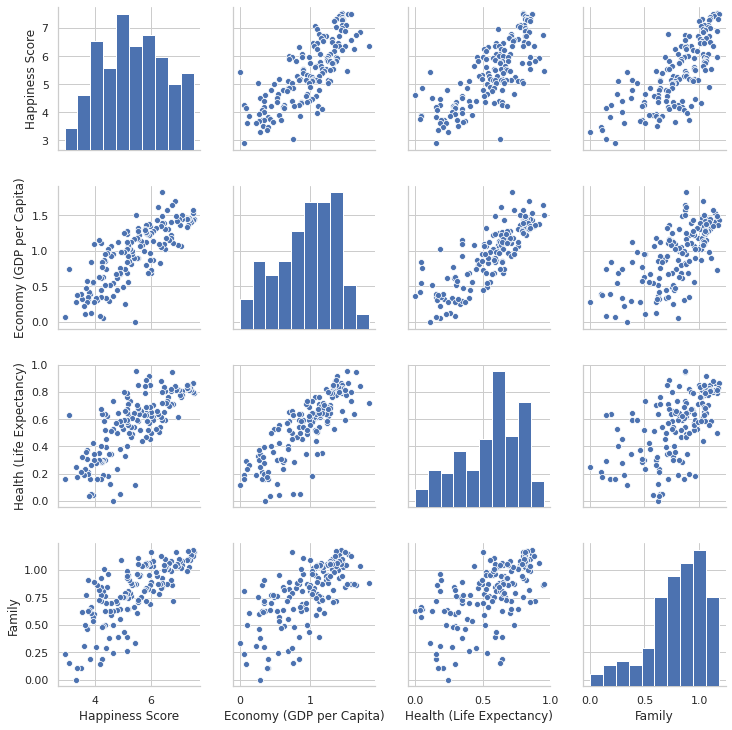

In [7]:
colNames = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']
sns.pairplot(happiness2016[colNames])
plt.show()

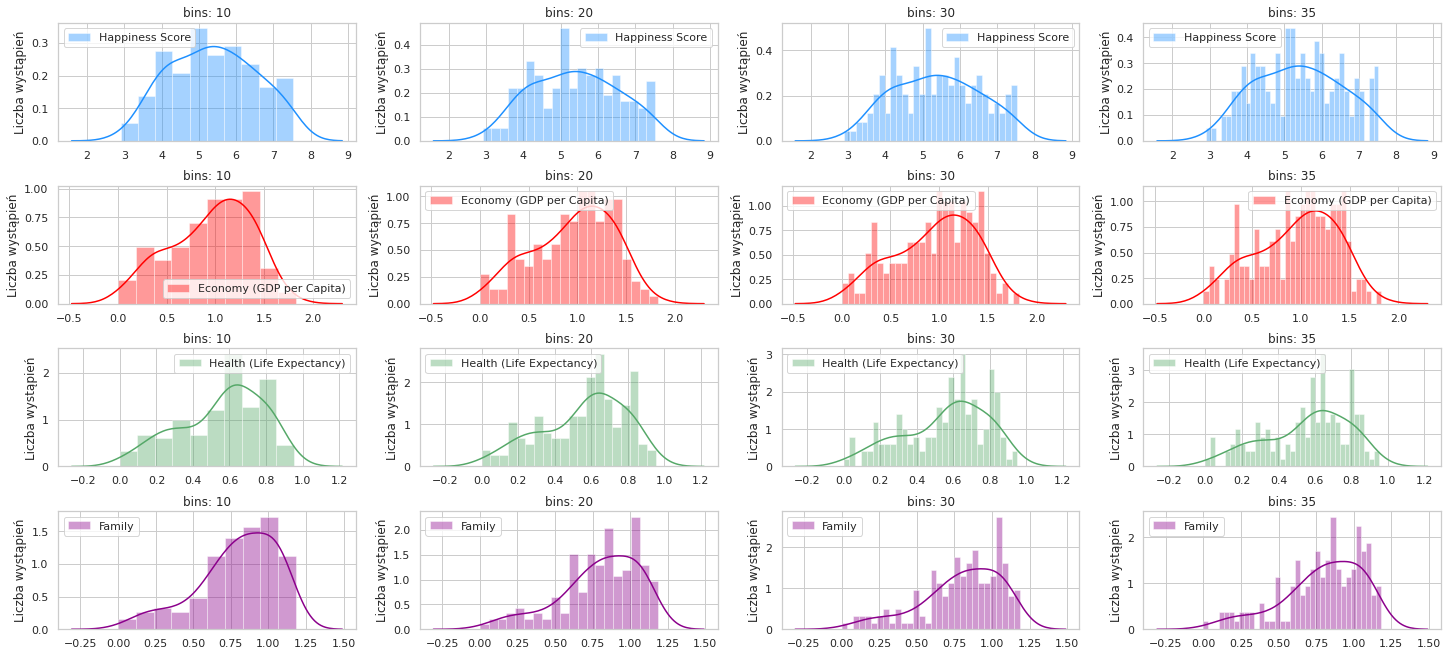

In [8]:
binsValues = [10,20,30,35]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames, bins=binsValues, set_width=20,  set_height=9)

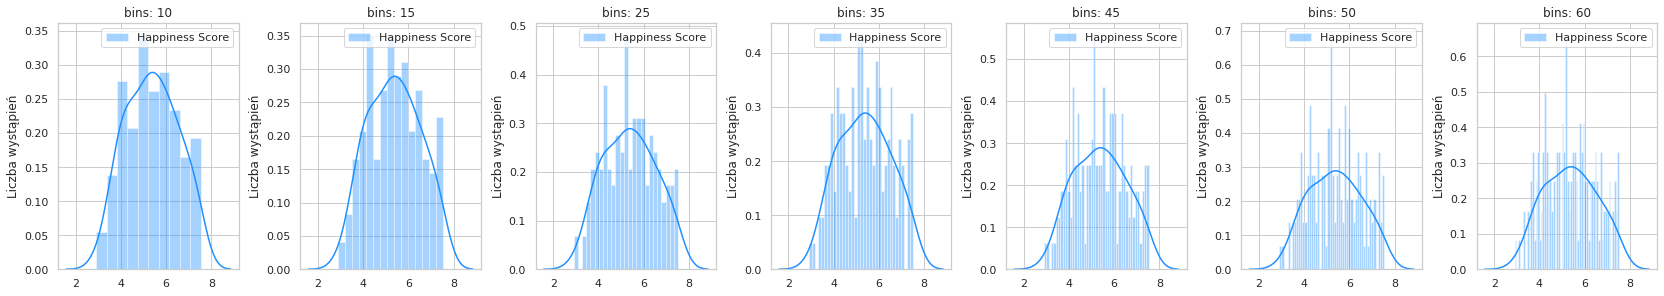

In [9]:
binsValues = [10, 15, 25, 35, 45, 50, 60]
DistributionObj.addHist_with_variety_values_of_bins(value=colNames[0], bins=binsValues, set_width=23, set_height=4)

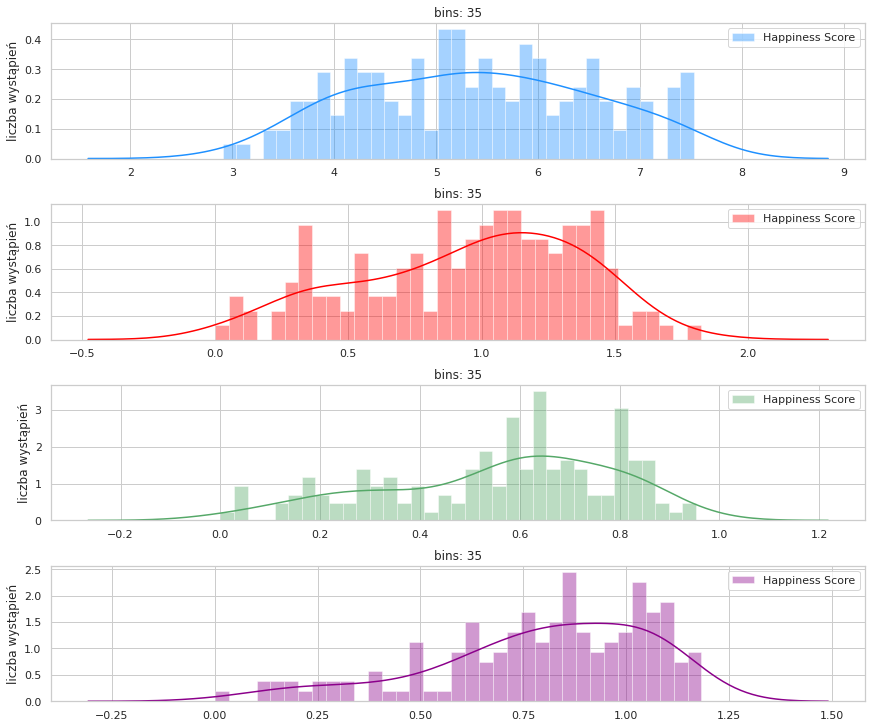

In [10]:
DistributionObj.addHist(value=colNames, bins=35, set_height=10, set_width=12)

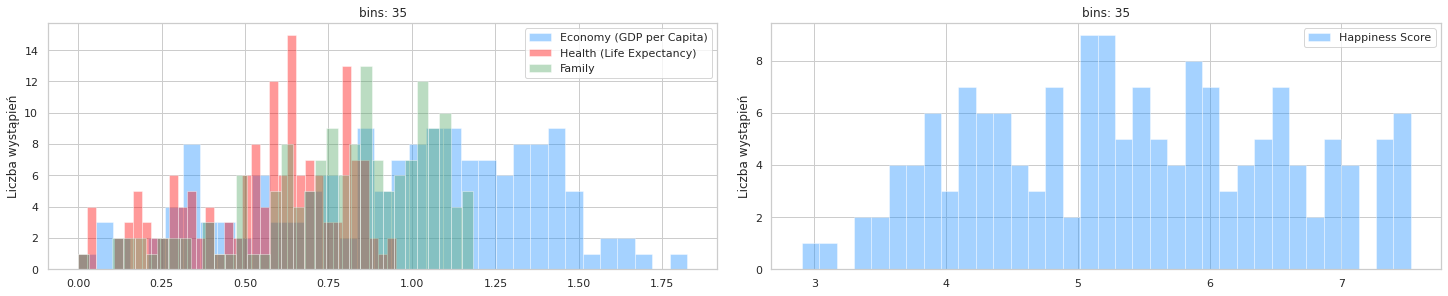

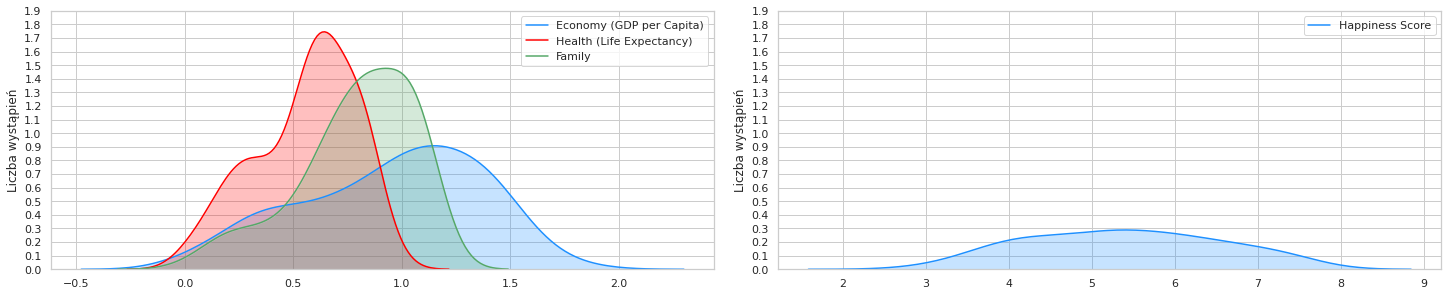

In [11]:
DistributionObj.addStackedHist(list= colNames, bins=35, set_width=20, set_height=4)
DistributionObj.addDensityDistribution(value=colNames, set_width=20, set_height=4)

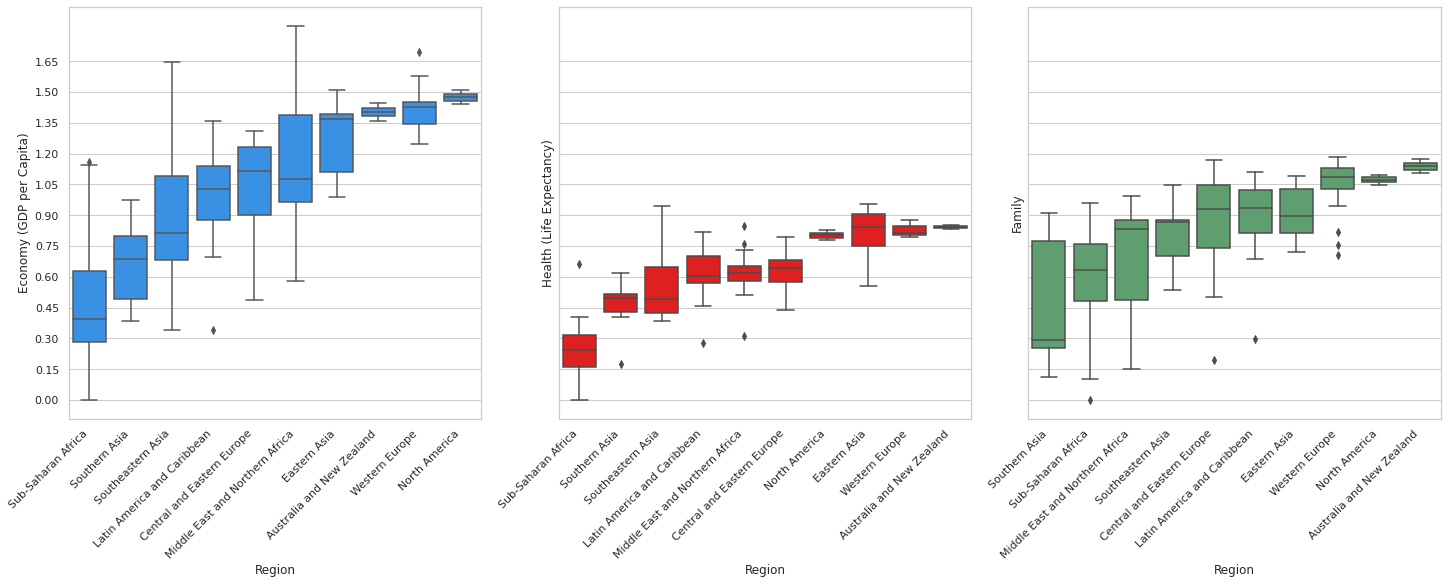

In [12]:
DistributionObj.addBoxPlot(x_value='Region', y_value=colNames, set_width=20, set_height=8)

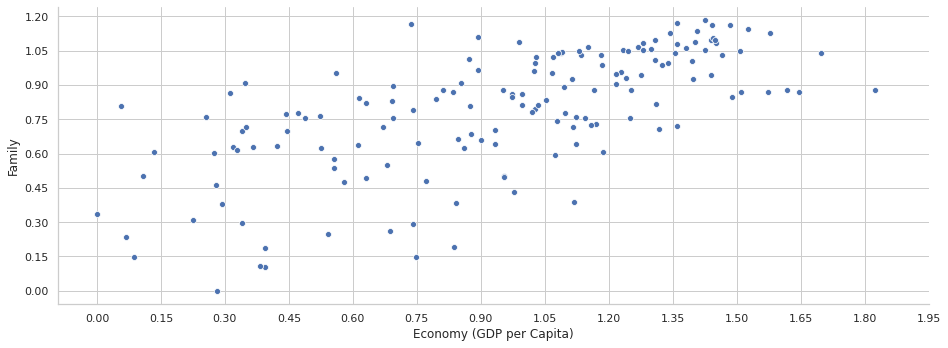

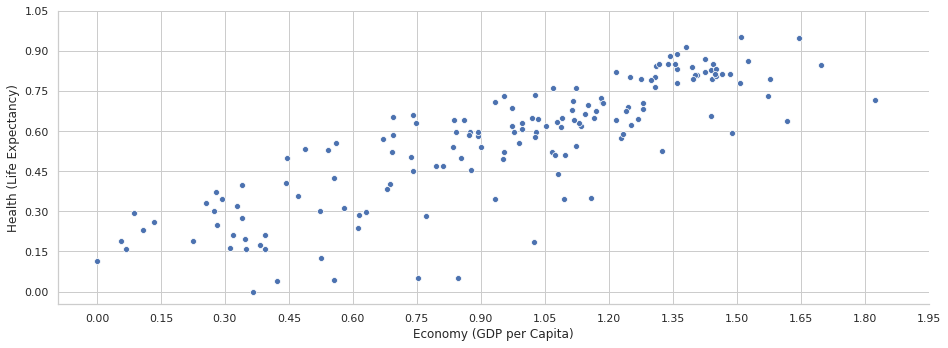

In [13]:
CorrelationObj.addScatterPlot(y_data='Family', x_data='Economy (GDP per Capita)', xstep=0.15, ystep=0.15, width=15, height=5)
CorrelationObj.addScatterPlot(y_data='Health (Life Expectancy)', x_data='Economy (GDP per Capita)', xstep=0.15, ystep=0.15, width=15, height=5)

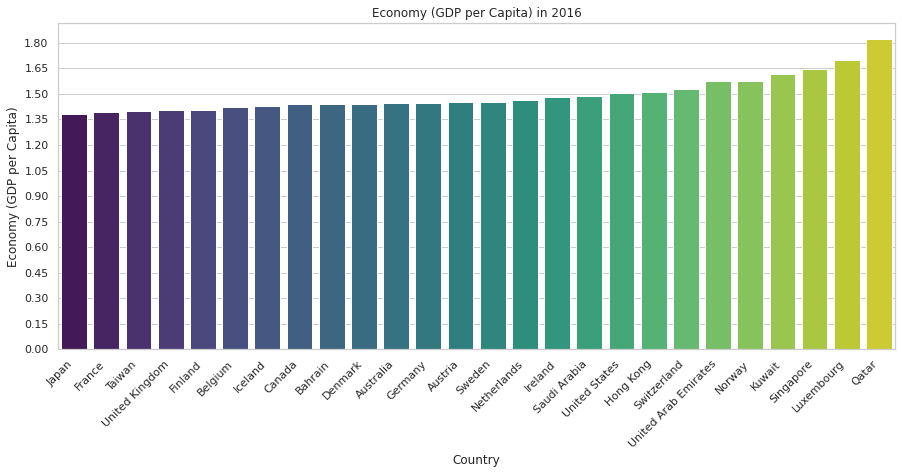

In [14]:
GDPperCapita_greaterThan1dota37 = happiness2016['Economy (GDP per Capita)'] >= 1.37

GDOP_data = happiness2016[GDPperCapita_greaterThan1dota37].sort_values(by='Economy (GDP per Capita)')

sns.set_style('whitegrid') 
plt.figure(figsize=(15,6))
plt.yticks(np.arange(0, 2.15, step=0.15))

g = sns.barplot(  data=GDOP_data, x='Country',  y='Economy (GDP per Capita)',palette='viridis',  ci=None )

g.set( xlabel='Country', ylabel='Economy (GDP per Capita)', title='Economy (GDP per Capita) in 2016')
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
plt.show()

In [15]:
happiness2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


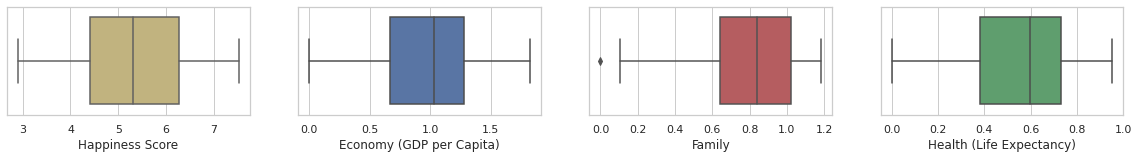

In [16]:
fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Happiness Score", data=happiness2016, ax=axes[0], color='y')
sns.boxplot(  x="Economy (GDP per Capita)", data=happiness2016, ax=axes[1], color='b')
sns.boxplot(  x="Family", data=happiness2016, ax=axes[2], color='r')
sns.boxplot(  x="Health (Life Expectancy)", data=happiness2016, ax=axes[3], color='g')
plt.show()

In [17]:
colNames = ['Happiness Score','Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']

# wyznaczamy dolną część pudełka (lewa część)
Q1 = happiness2016[colNames].quantile(0.25)

# wyznaczamy górną część pudełka (prawa część)
Q3 =  happiness2016[colNames].quantile(0.75)

# IQR - rozstęp kwartylowy
# Dla każdej właściwości wyznaczona wartość tolerancji,
# która określa jak mocno można odstawać od środka danych.
IQR = Q3 - Q1
IQR

Happiness Score             1.86500
Economy (GDP per Capita)    0.60940
Health (Life Expectancy)    0.34702
Family                      0.37968
dtype: float64

In [18]:
# Czy występują takie próbki, które są mniejsze aniżeli Q1 - 1.5 * rozstęp kwartylowy?
# Czy istnieją wartości wieksze od Q3 + 1.5 * IQR ?

# wartości, które oznaczone zostały jako True, to wartości, które należałoby z tego usunąć
outlier_condit =  ((happiness2016[colNames] < (Q1 - 1.5*IQR)) | (happiness2016[colNames] > (Q3 + 1.5*IQR)) ) 
outlier_condit  

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Family
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
152,False,False,False,False
153,False,False,False,False
154,False,False,False,True
155,False,False,False,False


In [19]:
happiness2016_iqr = happiness2016[colNames][~outlier_condit.any(axis=1)]
happiness2016_iqr

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Family
0,7.526,1.44178,0.79504,1.16374
1,7.509,1.52733,0.86303,1.14524
2,7.501,1.42666,0.86733,1.18326
3,7.498,1.57744,0.79579,1.12690
4,7.413,1.40598,0.81091,1.13464
...,...,...,...,...
151,3.515,0.32846,0.31865,0.61586
152,3.484,0.39499,0.21028,0.10419
153,3.360,0.38227,0.17344,0.11037
155,3.069,0.74719,0.62994,0.14866


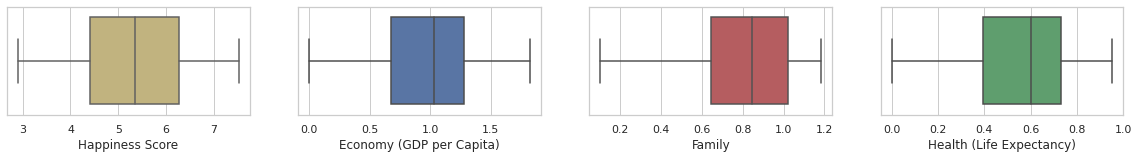

In [20]:
fig, axes = plt.subplots(1,4, figsize=(20,2))

sns.boxplot(  x="Happiness Score", data=happiness2016_iqr, ax=axes[0], color='y')
sns.boxplot(  x="Economy (GDP per Capita)", data=happiness2016_iqr, ax=axes[1], color='b')
sns.boxplot(  x="Family", data=happiness2016_iqr, ax=axes[2], color='r')
sns.boxplot(  x="Health (Life Expectancy)", data=happiness2016_iqr, ax=axes[3], color='g')
plt.show()

In [0]:
X = happiness2016[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']].values
y = happiness2016['Happiness Score'].values.reshape(-1,1)

X_iqr = happiness2016_iqr[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family']].values
y_iqr = happiness2016_iqr['Happiness Score'].values.reshape(-1,1)
                
# Przeskaluję dane
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler_iqr = StandardScaler()
scaler_iqr.fit(X_iqr)
X_iqr = scaler.transform(X_iqr)

In [22]:
metric_cols =[('SCORES', 'SCORE[%]'), ('SCORES', 'SCORE(IQR)[%]'), ('R2','Train[%]'), ('R2','Test[%]'), ('R2(IQR)','Train[%]'), ('R2(IQR)','Test[%]')]

metrics_df = pd.DataFrame(columns=metric_cols )
metrics_df.columns = pd.MultiIndex.from_tuples(metrics_df.columns)

index = 0

for i in range(150):  
  # Następnie podzielimy dane na zbiory uczące i testowe:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_iqr_train, X_iqr_test, y_iqr_train, y_iqr_test = train_test_split(X_iqr, y_iqr, test_size=0.2)

  lr = LinearRegression()
  lr.fit(X_train, y_train)

  lin_reg_iqr = LinearRegression()
  lin_reg_iqr.fit(X_iqr_train, y_iqr_train)

  y_pred_test = lr.predict(X_test)
  y_pred_iqr_sc_test = lin_reg_iqr.predict(X_iqr_test)

  y_pred_train = lr.predict(X_train)
  y_pred_iqr_sc_train = lin_reg_iqr.predict(X_iqr_train)
  
  score = lr.score(X_test, y_test)
  score_iqr = lr.score(X_iqr_test, y_iqr_test)

  r2_train =  r2_score(y_train, y_pred_train)
  r2_train_iqr = r2_score(y_iqr_train, y_pred_iqr_sc_train)

  r2_test =  r2_score(y_test, y_pred_test)
  r2_test_iqr = r2_score(y_iqr_test, y_pred_iqr_sc_test)

  SCORE, SCORE_IQR = (round(score*100,2), round(score_iqr*100,2) )
  R2_train, R2_test = (round(r2_train*100,2), round(r2_test*100,2))
  R2_IQR_train, R2_IQR_test = round(r2_train_iqr*100,2), round(r2_test_iqr*100,2)

  # #############################################################################

  metrics_df.loc[index] = [SCORE, SCORE_IQR, R2_train, R2_test, R2_IQR_train, R2_IQR_test]
  index +=1

metrics_df.head()

SCORES                     R2          R2(IQR)        
  SCORE[%] SCORE(IQR)[%] Train[%] Test[%] Train[%] Test[%]
0    62.48         61.55    76.73   62.48    74.05   60.72
1    77.80         79.93    70.81   77.80    70.70   79.87
2    77.67         81.13    71.76   77.67    69.91   81.31
3    77.30         74.13    72.27   77.30    72.49   73.14
4    57.88         70.37    76.69   57.88    73.40   69.74

In [23]:
filter1 = metrics_df['SCORES', 'SCORE[%]'] > 80
filter2 = metrics_df['SCORES', 'SCORE(IQR)[%]'] > 80
filter3 = metrics_df['R2', 'Train[%]'] > 80
filter4 = metrics_df['R2', 'Test[%]'] > 80
filter5 = metrics_df['R2(IQR)', 'Train[%]'] > 80
filter6 = metrics_df['R2(IQR)', 'Test[%]'] > 80


scores = metrics_df['SCORES', 'SCORE[%]'][filter1].count()
scores_iqr = metrics_df['SCORES', 'SCORE(IQR)[%]'][filter2].count()

r2_train = metrics_df['R2', 'Train[%]'][filter3].count()
r2_test = metrics_df['R2', 'Test[%]'][filter4].count()

r2_train_iqr = metrics_df['R2(IQR)', 'Train[%]'][filter5].count()
r2_test_iqr = metrics_df['R2(IQR)', 'Test[%]'][filter6].count()

print('Count of scores greater than 80%:')
print('Scores: {}'.format(scores))
print('scores(IQR): {}'.format(scores_iqr))

print()
print('Count of Coefficients of determination greater than 80%  (R2):')
print('Train: {}'.format(r2_train))
print('Test: {}'.format(r2_test))

print()
print('Count of Coefficients of determination greater than 80% -  (R2) IQR:')
print('Train: {}'.format(r2_train_iqr))
print('Test: {}'.format(r2_test_iqr ))

Count of scores greater than 80%:
Scores: 17
scores(IQR): 18

Count of Coefficients of determination greater than 80%  (R2):
Train: 1
Test: 17

Count of Coefficients of determination greater than 80% -  (R2) IQR:
Train: 0
Test: 10


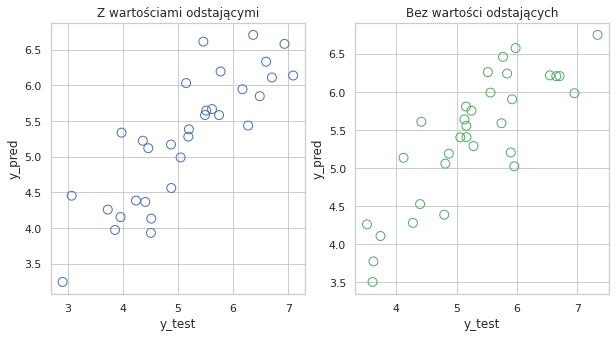

In [24]:
# Jak poszło przewidywanie danych
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].scatter(y_test, y_pred_test, s=80, facecolors='none', edgecolors='b')
ax[0].set_xlabel('y_test')
ax[0].set_ylabel('y_pred')
ax[0].set_title('Z wartościami odstającymi')

ax[1].scatter(y_iqr_test, y_pred_iqr_sc_test, s=80, facecolors='none', edgecolors='g')
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('y_pred')
ax[1].set_title('Bez wartości odstających')

plt.show()

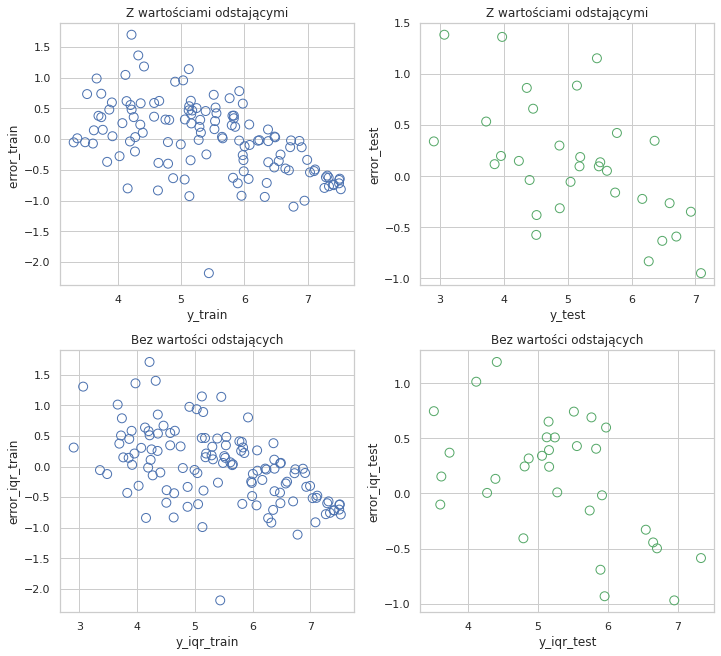

In [25]:
# Wykresy wartości resztowych:
fig, ax = plt.subplots(2, 2, figsize=(10,9), constrained_layout=True)

error_train = y_pred_train - y_train
error_test =  y_pred_test - y_test

ax[0,0].scatter(y_train, error_train, s=80, facecolors='none', edgecolors='b')
ax[0,0].set_xlabel('y_train')
ax[0,0].set_ylabel('error_train ')
ax[0,0].set_title('Z wartościami odstającymi')

ax[0,1].scatter(y_test, error_test, s=80, facecolors='none', edgecolors='g')
ax[0,1].set_xlabel('y_test')
ax[0,1].set_ylabel('error_test')
ax[0,1].set_title('Z wartościami odstającymi')



error_iqr_train = y_pred_iqr_sc_train - y_iqr_train
error_iqr_test =  y_pred_iqr_sc_test - y_iqr_test

ax[1,0].scatter(y_iqr_train, error_iqr_train, s=80, facecolors='none', edgecolors='b')
ax[1,0].set_xlabel('y_iqr_train')
ax[1,0].set_ylabel('error_iqr_train')
ax[1,0].set_title('Bez wartości odstających')

ax[1,1].scatter(y_iqr_test, error_iqr_test, s=80, facecolors='none', edgecolors='g')
ax[1,1].set_xlabel('y_iqr_test')
ax[1,1].set_ylabel('error_iqr_test')
ax[1,1].set_title('Bez wartości odstających')
plt.show()

In [26]:
print('Wartości wag:    {}'.format(lr.coef_))
print('Wartość stała w0: {}'.format(lr.intercept_))

w1 = round(lr.coef_[0][0], 3)
w2 = round(lr.coef_[0][1], 3)
w3 = round(lr.coef_[0][2], 3)

w0 = round(lr.intercept_[0], 3)

print()
print('Równanie funkcji wielomianowej: y = {} + {}x + {}x\u00b2 + {}x\u00b3'.format(w0, w1, w2, w3))


# Ile było dobrych w porównianiu do wszystkich wyników:
# Metoda score oblicza przewidywane wartości w oparciu o X_test, a następnie porównać je z y_test
score = lr.score(X_test, y_test)
print('SCORE: {}%'.format(round(score*100,2)))

Wartości wag:    [[0.35758152 0.35601514 0.36547217]]
Wartość stała w0: [5.40717412]

Równanie funkcji wielomianowej: y = 5.407 + 0.358x + 0.356x² + 0.365x³
SCORE: 70.2%
